In [1]:
from __future__ import print_function

#Machine Learning in Python

##Logistic Regression

###1: Introduction to the Data

Every year high school student and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. Logistic regression is a suitable method for this particular problem which we will address in this mission.

To grasp the concepts of logistic regression we try to predict whether an applicant will be admitted to a graduate program in a United States university. The dataset contains 1,000 applicants with the following columns:

- gre - Graduate Record Exam, a generalized test for prospective graduate students, continuous between 200 and 800
- gpa - Cumulative grade point average, continuous between 0.0 and 4.0
- admit - Binary variable, 0 or 1, where 1 means the applicant was admitted to the program

The first part of any data analysis is to gain a basic insights about the data. Visualizations and summarizations of the data are effective for this task. These basic insights provide valuable information pertaining to the direction of the analysis.

####Instructions

Read admissions.csv into a pandas dataframe named admissions.

Create a scatter plot where the x-axis is gpa and the y-axis is admit.

In [2]:
import pandas

admissions = pandas.read_csv("data/admissions.csv")
admissions.head(5)

,Unnamed: 0,admit,gpa,gre
0,0,0,3.177277,594.102992
1,1,0,3.412655,631.528607
2,2,0,2.728097,553.714399
3,3,0,3.093559,551.089985
4,4,0,3.141923,537.184894


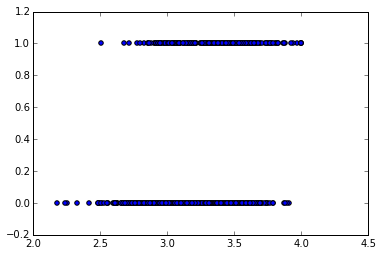

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Scatter plot.
plt.scatter(admissions["gpa"], admissions["admit"])
plt.show()

###2: Use Linear Regression to Predict Admission

Let's try to use linear regression to predict admission and see what happens. We can use Sklearn to fit the linear regression model.

####Instructions

Predict admissions with all rows and the gpa and gre columns in the dataset using the linear regression model, model, to the variable admit_prediction.

Create a scatter plot of observed gpa and admit_prediction.

predict: [ 0.14029222]


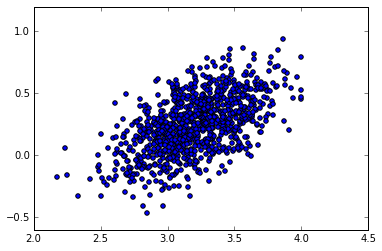

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Import linear regression class.
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model.
model = LinearRegression()

# Fit model.
model.fit(admissions[['gre', 'gpa']], admissions["admit"])

# This is how we can predict a new observation given gre=600 and gpa=3.0.
predict = model.predict([[600., 3.0]])
print("predict:", predict)

# Prediction of admission.
admit_prediction = model.predict(admissions[['gre', 'gpa']])

# Plot Estimated Function.
plt.scatter(admissions["gpa"], admit_prediction)

###3: Intepretting Linear Model

From the previous plot we can see that the linear model is difficult to intepret in terms of predicting admission. The model itself is allowing for predictions less than 0 while we know that our prediction should be 0 or 1. Similarly, if gpa is increased high enough we would see predictions greater than 1. Ideally, we want to create a model which gives us a probability of admission by constraining the output between 0 and 1. Then we'd be able to use the tools we learned in the previous classification mission to interpret prediction and performance.

###4: The Logit Function

Logistic regression is a popular method for classification which does constrain outputs between 0 and 1. This output can be viewed as the probability of an event given a set of inputs, just like any other classification method.

The logit function is the basis of the logistic regression. This function takes the form, $\sigma(t)=\dfrac{e^t}{1+e^t}$ where $e^t$ is an irrational constant raised to the power $t$. We will visualize this by varying $t$. We see a function which is "s-shaped" and constrained between 0 and 1. These attributes make the logistic function able to predict a binary output.

####Instructions

Lets see what happens when logit function is evaluated at extreme values. Set the value evaluated by logit at -10 to a and 10 to b.

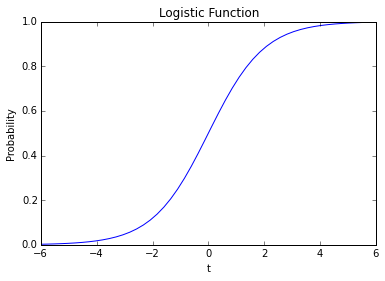

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Logistic Function.
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828.
    return np.exp(x) / (1 + np.exp(x)) 

# Linspace is as numpy function to produced evenly spaced numbers over a specified interval.
# Create an array with 50 values between -6 and 6 as t.
t = np.linspace(-6,6,50, dtype=float)

# Get logistic fits.
ylogit = logit(t)

# Plot the logistic function.
plt.plot(t, ylogit, label="logistic")
plt.ylabel("Probability")
plt.xlabel("t")
plt.title("Logistic Function")
plt.show()
a = logit(-10)
b = logit(10)

###5: Bernoulli Random Variable

To get a good understand of the logistic regression we must introduce bernoulli random variables. A Bernoulli random variable says that the probability of an event happening is p while the probability of the event not happening is 1-p.

Imagine we toss a coin where there is a 50% probability of landing heads and a 50% probability of landing tails. This is an example of a bernoulli random variable. In math terms, the bernoulli random variable for p=0.50 is written as $Y=Bernoulli(0.50)$.

Say we toss the coin 80 times, how many heads would you expect to get? Well, each time the coin is tossed there is a 50% chance of heads. If we throw it 80 times we would expect 80*0.50, or 40, heads.

####Instructions

Lets say our coin is biased so there is now a 60% chance of landing heads. Set the expected number of heads in 60 tosses to biased_heads.

In [6]:
biased_heads = 0.6 * 60

###6: The Logistic Regression

As we've seen, a linear regression model takes in a set of features, multiplies each by a coefficient, and adds the terms together to predict an output. A linear regression is written as $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ where $\beta_0$ is the intercept and all other $\beta\text{'s}$ are slopes. Using this general format, we can use $y$ as the input to a logit function to "squash" the output between 0 and 1. $\pi_i=\dfrac{e^y}{1+e^y}$. The output of this logit function is then modeled as a probability, more specifically a Bernoulli random variable. A logistic regression model is then produced by using a linear model as an input of the logit function,

$\pi=\dfrac{e^y}{1+e^y}=\dfrac{e^{\beta_0+\beta_1x_1 + \beta_2 x_2}}{1+e^{\beta_0+\beta_1x_1+\beta_2 x_2}}$ where $P(event) = Bernoulli(\pi_i)$ and $\beta_i$ are coefficients.

Any number of features can be used by just decreasing or increasing the number of coefficients. Similar to a linear regression model, we want to compute the optimal values of our coefficents, each $\beta_i$, to minimize the the error between the output and the true value. Methods to minimize the error in this model include maximum likelihood estimation and gradient descent which we will cover in later missions. For now we will rely on the well known sklearn package to fit such a model.

To use this model to predict admission we can write it as, $\pi_i=\dfrac{e^{\beta_0+\beta_1GPA_i+\beta_2GRE_i}}{1+e^{\beta_0+\beta_1GPA_i+\beta_2GRE_i}}$. We can see that our π now dependes on both GPA and GRE scores which we can use in prediction of admission. Our predictand is whether a person was admitted or not. Just as we did in the linear regression, we are optimizing a linear model, but this time it is inside another function.

###7: Model Data

Lets try to predict admission using the logistic regression model. With each row representing an observation, the first 700 rows will be for training the model and the last 300 will be used for testing.

Sklearn can also be used to fit a logistic regression model, similar to that of the linear regression model. To use this function we must initialize an LogisticRegression object then use the .fit function to fit the model. .predict_proba can then be used to find predicted probabilities from the model -- this function will return a matrix where the first column is the probability of the event not happening and the second column is the probability of the event happening, each row representations an oberservation.

####Instructions

Now that we have fit the model we can predict the probability of admission. Assign the probability of admission from the test set to fitted_test.

Now, make a scatter plot with data_test["gre"] on the x-axis and fitted_test on the y-axis.

logistic_model.coef_: [[ 0.26205955  0.00623287]]


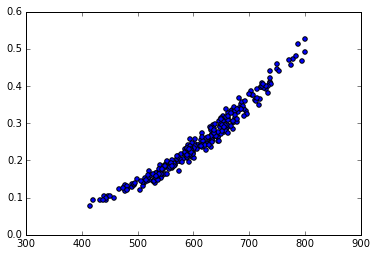

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Randomly shuffle our data for the training and test set.
admissions = admissions.loc[np.random.permutation(admissions.index)]

# Train with 700 and test with the following 300, split dataset.
num_train = 700
data_train = admissions[:num_train]
data_test = admissions[num_train:]

# Fit Logistic regression to admit with gpa and gre as features using the training set.
logistic_model = LogisticRegression()
logistic_model.fit(data_train[['gpa', 'gre']], data_train['admit'])

# Print the Models Coefficients.
print("logistic_model.coef_:", logistic_model.coef_)

# Predict the chance of admission from those in the training set.
fitted_vals = logistic_model.predict_proba(data_train[['gpa', 'gre']])[:,1]
fitted_test = logistic_model.predict_proba(data_test[['gpa', 'gre']])[:,1]

plt.scatter(data_test["gre"], fitted_test)
plt.show()

###8: Predictive Power

In the previous lesson we learned about quantifying a classification model's performance. For simplicity, we will say if the probability of admission is greater than 0.5 then the applicant was admitted. We can then compute the accuracy of our model by comparing the admitted students versus predicted students.

####Instructions

In the test set, data_test, what percentage of applicants were admitted? Assign this value to percent_admitted.

With the fitted model, logistic_model, and data_test, predict admission for each observation in the test set using the .predict() method. By default .predict() uses a discrimination threshold of 0.50. Assign the accuracy of our model to accuracy_test.

In [8]:
# .predict() using a threshold of 0.50 by default.
predicted = logistic_model.predict(data_train[['gpa','gre']])

# The average of the binary array will give us the accuracy.
accuracy_train = (predicted == data_train['admit']).mean()
print("accuracy_train:", accuracy_train)

# Percentage of those admitted.
percent_admitted = data_test["admit"].mean() * 100
print("percent_admitted:", percent_admitted)

# Predicted to be admitted.
predicted = logistic_model.predict(data_test[['gpa','gre']])
print("predicted:\n", predicted)

# What proportion of our predictions were true.
accuracy_test = (predicted == data_test['admit']).mean()
print("accuracy_test:", accuracy_test)

accuracy_train: 0.768571428571
percent_admitted: 27.0
predicted:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

###9: Admissions ROC Curve

In the previous mission the receiver operating characteristic curve was also introduced. ROC is widely used to evaluate classification algorithms including logistic regression. Lets apply what we previously learned about ROC and area under the curve to the logistic_model we trained.

####Instructions

Compute the AUC (Area under the ROC curve) for both the training and testing probabilities using the logistic_model, data_train, and data_test.

Assign the AUC of data_train to auc_train.

Assign the AUC of data_test to auc_test.

Subtract auc_train from auc_test and assign it to auc_diff.

(Optional) You may find it helpful to plot the corresponding ROC curves.

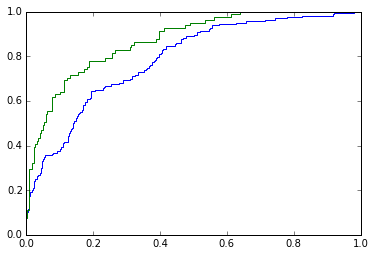

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the probabilities predicted by the training and test set.
# 'predict_proba' returns probabilies for each class.
train_probs = logistic_model.predict_proba(data_train[['gpa', 'gre']])[:,1]
test_probs = logistic_model.predict_proba(data_test[['gpa', 'gre']])[:,1]

# Compute auc for training set.
auc_train = roc_auc_score(data_train["admit"], train_probs)

# Compute auc for test set.
auc_test = roc_auc_score(data_test["admit"], test_probs)

# Difference in auc values.
auc_diff = auc_train - auc_test

# Compute ROC Curves.
roc_train = roc_curve(data_train["admit"], train_probs)
roc_test = roc_curve(data_test["admit"], test_probs)

# Plot false positives by true positives.
plt.plot(roc_train[0], roc_train[1])
plt.plot(roc_test[0], roc_test[1])

###10: Interpret the ROC Curve

We see the ROC curve is reasonably steep in the beginning and slowly flattens out. The AUC for the test set is 0.79, just smaller than the training set AUC at 0.82. These are both indications that our model has learned to predict admission using just gpa and gre scores.

In the following missions we will learn different binary classification models and how these measures allow for comparision between models.